# Проверка гипотезы определения магнитной индукции внешнего поля с помощью NV-центров

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.constants

In [3]:
# Функция для нахождения точек минимума аппроксимации
def get_minimum_points(approx_function: np.poly1d) -> list:
    crit = approx_function.deriv().r
    r_crit = crit[crit.imag==0].real
    test = approx_function.deriv(2)(r_crit) 
    x_min = r_crit[test>0]
    y_min = approx_function(x_min)
    return [[x_min[i], y_min[i]] for i in range(len(x_min))]

In [4]:
# Функция для подсчёта разницы частоте между точками минимума
def get_distance(points: list) -> np.format_float_scientific:
    return np.format_float_scientific(np.abs(points[0][0]-points[1][0]), 2)

In [5]:
# Функция создания графика
def make_plot(B: str, 
              frequency_values: np.array, 
              photons_values: np.array, 
              approximation_function: np.poly1d, 
              x_location: int,
              y_location: int,
              distance: np.format_float_scientific):
    plt.title(f'Зависимость количества фотонов от частоты ({B})')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Количество фотонов')
    plt.plot(frequency_values, photons_values, linestyle="dashed", color="red", label="Эксперимент")
    plt.plot(frequency_values, approximation_function(frequency_values), color="blue", label="Аппроксимация")
    for point in points:
        plt.plot(point[0], point[1], marker='o', color='black')
    plt.text(x_location,y_location, f'Δ={distance}', size=12, color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

In [6]:
# Считываем файлы в переменные
with open('data/B=0.txt') as file:
    data_b_0 = file.readlines()
with open('data/A=0.5.txt') as file:
    data_a_0_5 = file.readlines()
with open('data/A=1.0.txt') as file:
    data_a_1_0 = file.readlines()
with open('data/A=1.5.txt') as file:
    data_a_1_5 = file.readlines() 
with open('data/A=2.0.txt') as file:
    data_a_2_0 = file.readlines() 

In [7]:
# Считываем минимальную и максимальную частоты и шаг частоты
freq_data = [int(data_b_0[0].split(sep=',')[i]) for i in range(3)]
freq_min, freq_max, freq_step = [freq_data[i] for i in range(len(freq_data))]

In [8]:
# Создаём массив частот
freq_values = np.arange(start=freq_min, stop=freq_max+1, step=freq_step)

In [9]:
# Создаём массивы количества фотонов
pht_data_b_0 = np.array([float(i) for i in data_b_0[1:]])
pht_data_a_0_5 = np.array([float(i) for i in data_a_0_5[1:]])
pht_data_a_1_0 = np.array([float(i) for i in data_a_1_0[1:]])
pht_data_a_1_5 = np.array([float(i) for i in data_a_1_5[1:]])
pht_data_a_2_0  = np.array([float(i) for i in data_a_2_0[1:]])

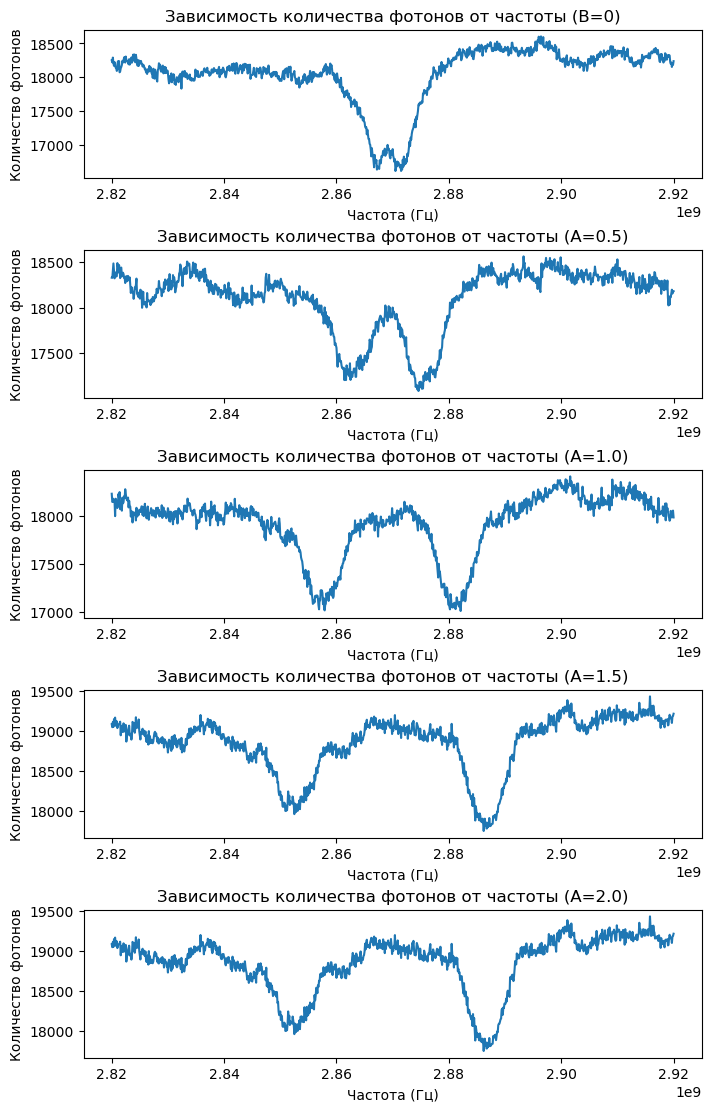

In [10]:
# Строим первичные графики
fig, (plt1, plt2, plt3, plt4, plt5) = plt.subplots(5, 1, layout='constrained') 
fig.set_size_inches(7, 11)

plt1.plot(freq_values, pht_data_b_0)
plt1.set_title('Зависимость количества фотонов от частоты (B=0)')

plt2.plot(freq_values, pht_data_a_0_5)
plt2.set_title('Зависимость количества фотонов от частоты (A=0.5)')

plt3.plot(freq_values, pht_data_a_1_0)
plt3.set_title('Зависимость количества фотонов от частоты (A=1.0)')

plt4.plot(freq_values, pht_data_a_1_5)
plt4.set_title('Зависимость количества фотонов от частоты (A=1.5)')

plt5.plot(freq_values, pht_data_a_1_5)
plt5.set_title('Зависимость количества фотонов от частоты (A=2.0)')

plts = [plt1, plt2, plt3, plt4, plt5]
[i.set_xlabel('Частота (Гц)') for i in plts]
[i.set_ylabel('Количество фотонов') for i in plts]

plt.show()


In [11]:
# Выделяем участка для изучения на 1 графике
min_index, max_index = np.where(freq_values == 2866000000)[0][0], np.where(freq_values == 2873000000)[0][0]
freq_values_1 = freq_values[min_index:max_index]
pht_values_1 = pht_data_b_0[min_index:max_index]

In [12]:
# Создаём аппроксимирующую функцию и находим точки минимума
approx_1 = np.poly1d(np.polyfit(x=freq_values_1, y=pht_values_1, deg=5))
points = get_minimum_points(approx_1)
# Находим разницу частоты между точками
dist_1 = get_distance(points)

D:\Users\sverr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


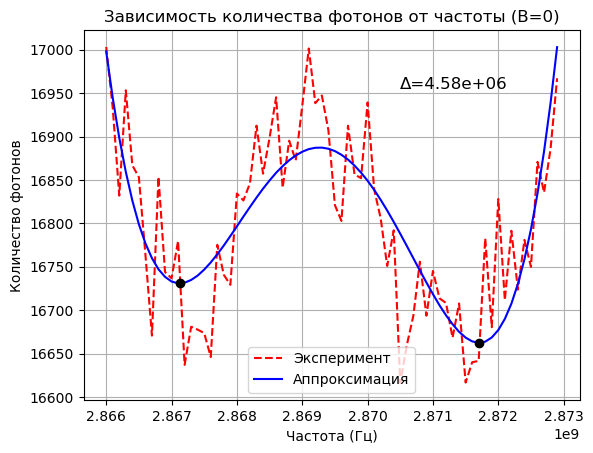

In [13]:
make_plot('B=0', freq_values_1, pht_values_1, approx_1, 2870500000, 16955, dist_1)

In [14]:
# Выделяем участка для изучения на 2 графике
min_index, max_index = np.where(freq_values == 2859000000)[0][0], np.where(freq_values == 2879000000)[0][0]
freq_values_2 = freq_values[min_index:max_index]
pht_values_2 = pht_data_a_0_5[min_index:max_index]

In [15]:
# Создаём аппроксимирующую функцию и находим точки минимума
approx_2 = np.poly1d(np.polyfit(x=freq_values_2, y=pht_values_2, deg=5))
points = get_minimum_points(approx_2)
# Находим разницу частоты между точками
dist_2 = get_distance(points)

D:\Users\sverr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


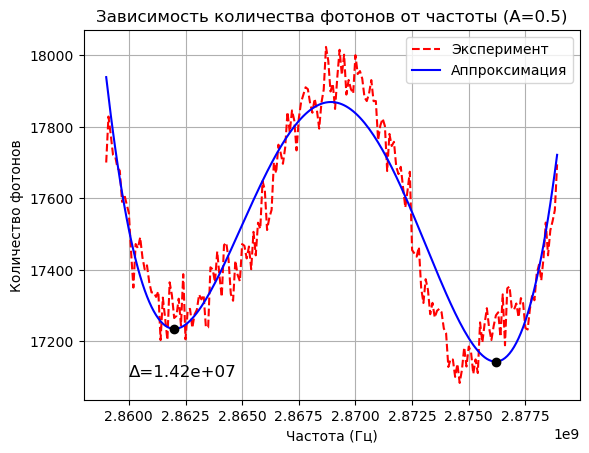

In [16]:
make_plot('A=0.5', freq_values_2, pht_values_2, approx_2, 2860000000, 17100, dist_2)

In [17]:
# Выделяем участка для изучения на 3 графике
min_index, max_index = np.where(freq_values == 2853000000)[0][0], np.where(freq_values == 2886000000)[0][0]
freq_values_3 = freq_values[min_index:max_index]
pht_values_3 = pht_data_a_1_0[min_index:max_index]

In [18]:
# Создаём аппроксимирующую функцию и находим точки минимума
approx_3 = np.poly1d(np.polyfit(x=freq_values_3, y=pht_values_3, deg=5))
points = get_minimum_points(approx_3)
# Находим разницу частоты между точками
dist_3 = get_distance(points)

D:\Users\sverr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


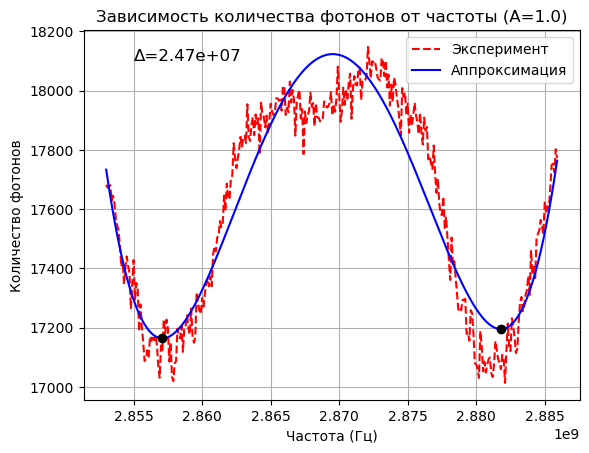

In [19]:
make_plot('A=1.0', freq_values_3, pht_values_3, approx_3, 2855000000, 18100, dist_3)

In [20]:
# Выделяем участка для изучения на 4 графике
min_index, max_index = np.where(freq_values == 2845000000)[0][0], np.where(freq_values == 2895000000)[0][0]
freq_values_4 = freq_values[min_index:max_index]
pht_values_4 = pht_data_a_1_5[min_index:max_index]

In [21]:
# Создаём аппроксимирующую функцию и находим точки минимума
approx_4 = np.poly1d(np.polyfit(x=freq_values_4, y=pht_values_4, deg=5))
points = get_minimum_points(approx_4)
# Находим разницу частоты между точками
dist_4 = get_distance(points)

D:\Users\sverr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


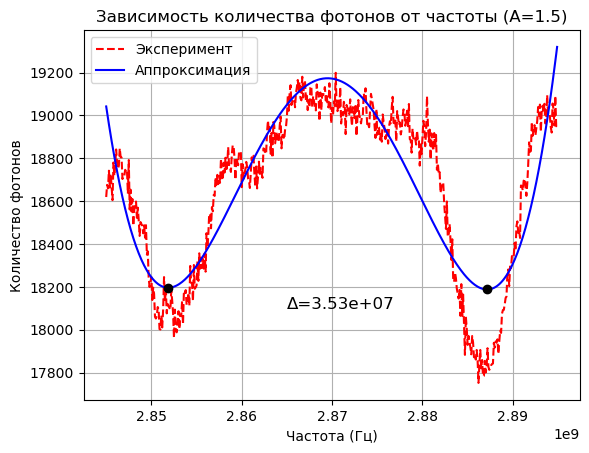

In [22]:
make_plot('A=1.5', freq_values_4, pht_values_4, approx_4, 2865000000, 18100, dist_4)

In [23]:
# Выделяем участка для изучения на 5 графике
min_index, max_index = np.where(freq_values == 2848000000)[0][0], np.where(freq_values == 2893000000)[0][0]
freq_values_5 = freq_values[min_index:max_index]
pht_values_5 = pht_data_a_1_5[min_index:max_index]

In [24]:
# Создаём аппроксимирующую функцию и находим точки минимума
approx_5 = np.poly1d(np.polyfit(x=freq_values_5, y=pht_values_5, deg=5))
points = get_minimum_points(approx_5)
# Находим разницу частоты между точками
dist_5 = get_distance(points)

D:\Users\sverr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


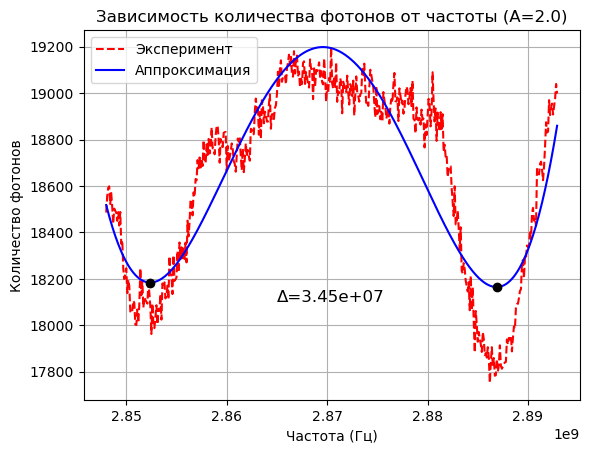

In [25]:
make_plot('A=2.0', freq_values_5, pht_values_5, approx_5, 2865000000, 18100, dist_5)

$$B=\mu\mu_0 I\frac{N}{l}$$

In [26]:
# Рассчитываем магнитную индукцию соленоида
N = 67 # Количество витков
l = 10*10**(-1) # (м)
B_0 = 60*10**(-6) # (Тл)
B_0_5 = B_0 + sp.constants.mu_0*1*0.5*(N/l) # (Тл)
B_1_0 = B_0 + sp.constants.mu_0*1*1.0*(N/l) # (Тл)
B_1_5 = B_0 + sp.constants.mu_0*1*1.5*(N/l) # (Тл)
B_2_0 = B_0 + sp.constants.mu_0*1*2.0*(N/l) # (Тл)

In [31]:
# Создаём массивы для расстояний и магнитной индукции
distance = [dist_1, dist_2, dist_3, dist_4, dist_5]
B = [B_0, B_0_5, B_1_0, B_1_5, B_2_0]
B_new = [float/2*(28*10**9) for i in distance]

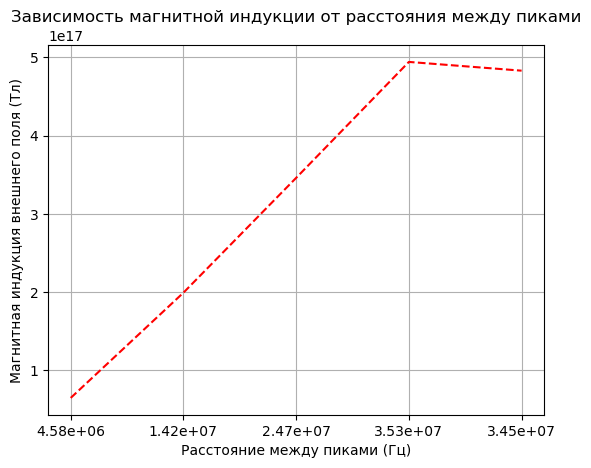

In [32]:
plt.title('Зависимость магнитной индукции от расстояния между пиками')
plt.xlabel('Расстояние между пиками (Гц)')
plt.ylabel('Магнитная индукция внешнего поля (Тл)')
plt.plot(distance, B_new, linestyle="dashed", color="red")
plt.grid(True)
plt.show()